In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import mlgrad.regr as regr
import mlgrad.models as models
import mlgrad.inventory as inventory
import mlgrad.plots as plots

In [3]:
df = pd.read_csv("data/mammals.csv", sep=",")
df

,name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [4]:
body = df.body.values
brain = df.brain.values
names = df.name.values

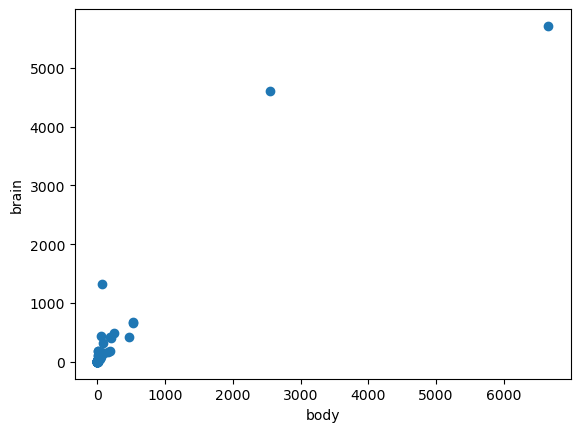

In [5]:
plt.scatter(body, brain)
plt.xlabel("body")
plt.ylabel("brain")
plt.show()

In [6]:
X = np.log(body)
Y = np.log(brain)

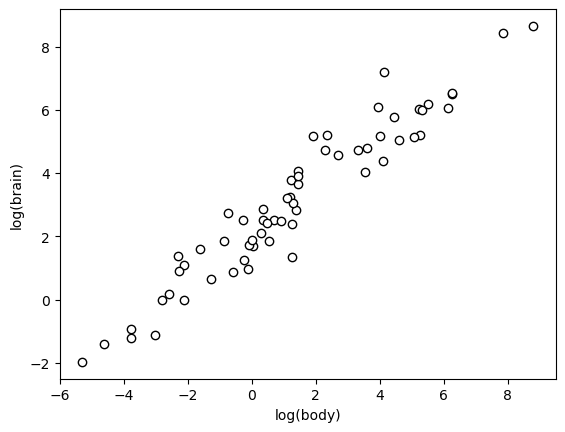

In [7]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.xlabel("log(body)")
plt.ylabel("log(brain)")
plt.show()


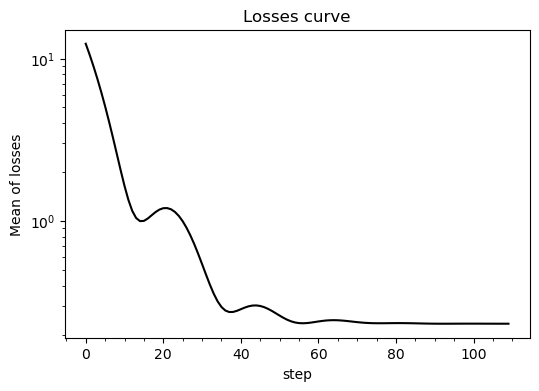

In [8]:
linmod1 = models.LinearModel(1)
alg1 = regr.regression(X[:,None], Y, linmod1, h=0.1, tol=1.0e-6)

plots.plot_losses(alg1, logscale=True)

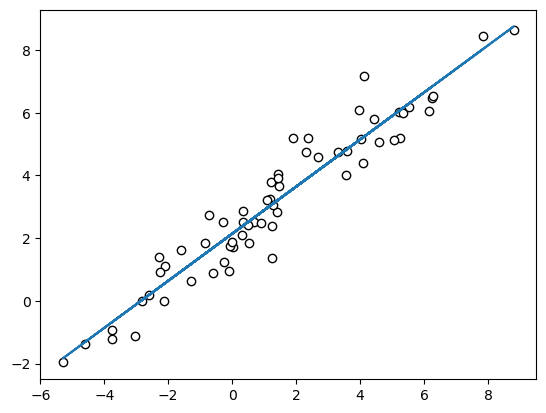

In [9]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod1.evaluate(X[:,None]))
plt.show()

In [11]:
E = abs(linmod1.evaluate(X[:,None]) - Y)

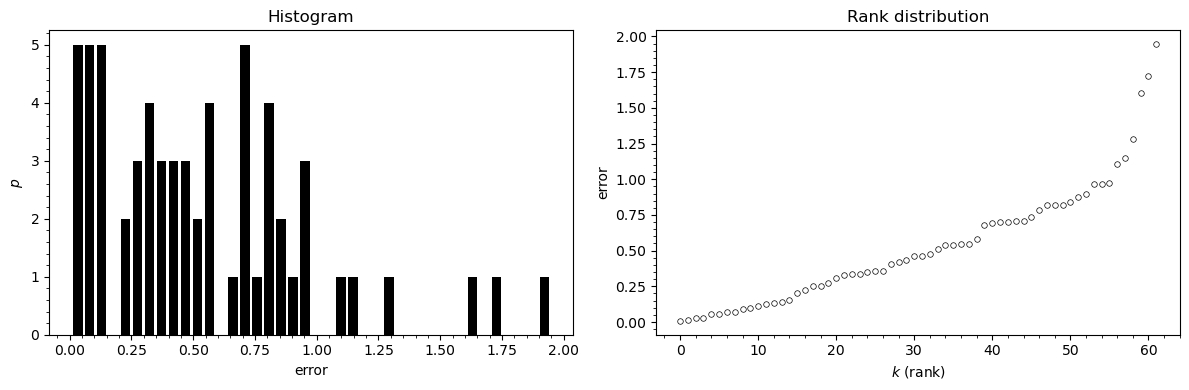

In [12]:
plots.plot_hist_and_rank_distribution(E, ylabel="error")

In [13]:
#Z = inventory.zscore(E)
Z = (E - E.mean()) / E.std()

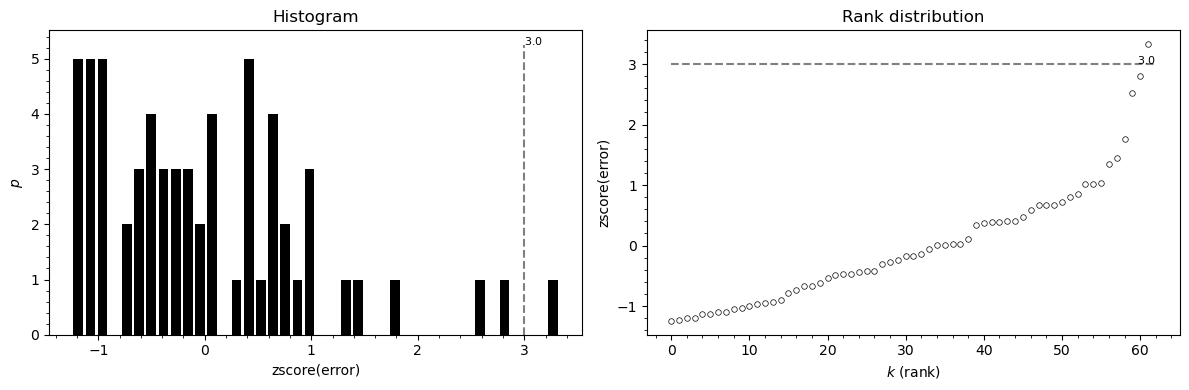

In [14]:
plots.plot_hist_and_rank_distribution(Z, ylabel="zscore(error)", levels=[3.0])

In [16]:
Zm = inventory.modified_zscore(E)

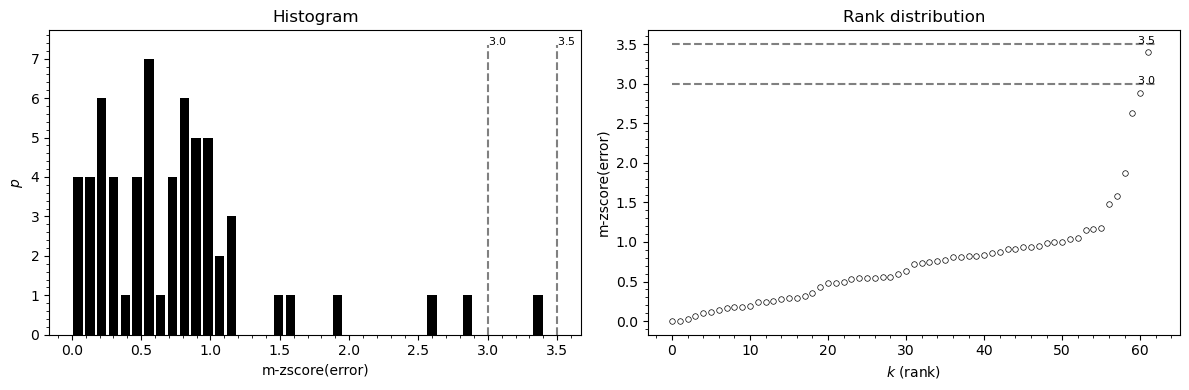

In [17]:
plots.plot_hist_and_rank_distribution(abs(Zm), ylabel="m-zscore(error)", levels=[3.0,3.5])

In [18]:
X1 = X[Zm < 3.0]
Y1 = Y[Zm < 3.0]

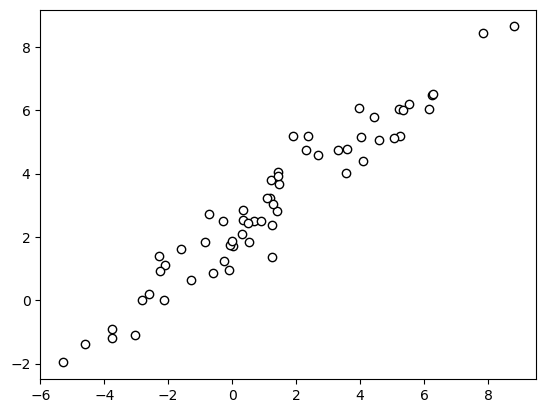

In [19]:
plt.scatter(X1, Y1, c="w", edgecolors="k")
plt.show()

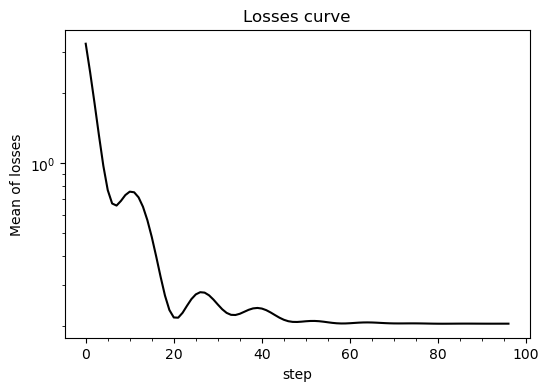

In [20]:
linmod2 = models.LinearModel(1)
alg2 = regr.regression(X1[:,None], Y1, linmod2, h=0.1)

plots.plot_losses(alg2, logscale=True)

In [21]:
E2 = abs(linmod2.evaluate(X1[:,None]) - Y1)
Zm2 = inventory.modified_zscore(E2)

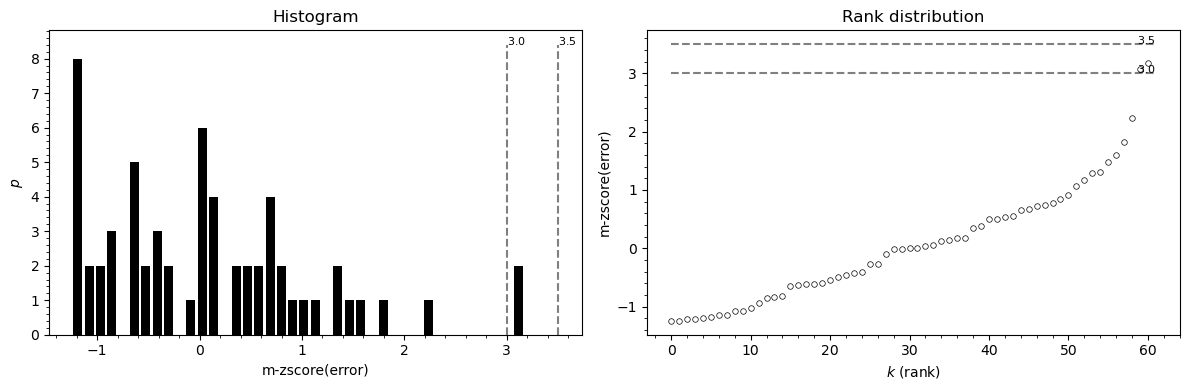

In [22]:
plots.plot_hist_and_rank_distribution(Zm2, ylabel="m-zscore(error)", levels=[3.0,3.5])

In [23]:
X2 = X1[Zm2 < 3]
Y2 = Y1[Zm2 < 3]

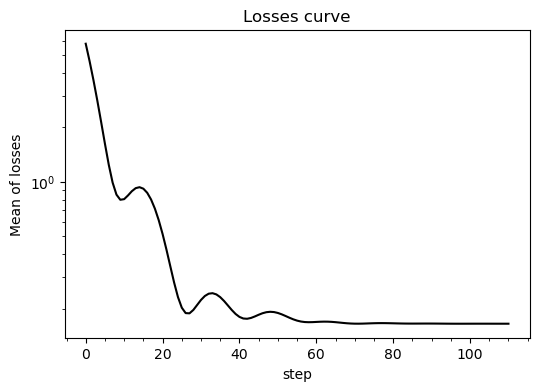

In [24]:
linmod3 = models.LinearModel(1)
alg3 = regr.regression(X2[:,None], Y2, linmod3, h=0.1)

plots.plot_losses(alg3, logscale=True)

In [25]:
E3 = abs(linmod3.evaluate(X2[:,None]) - Y2)
Zm3 = inventory.modified_zscore(E3)

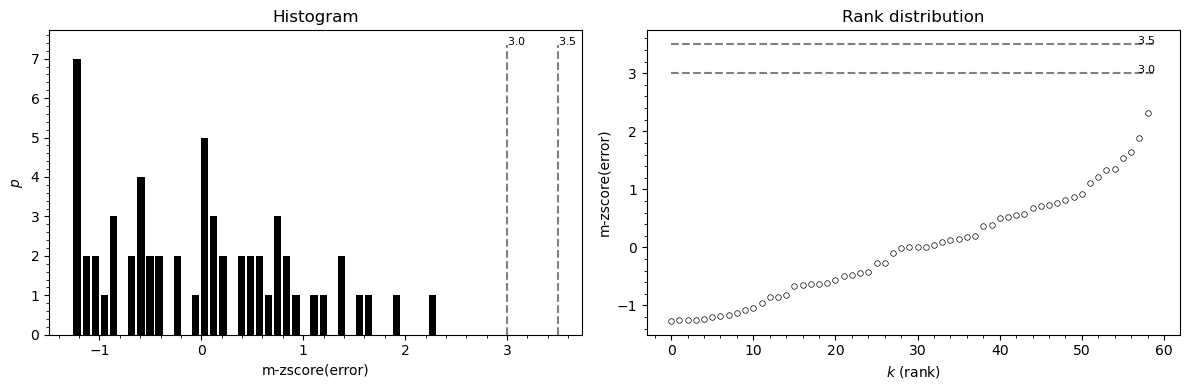

In [26]:
plots.plot_hist_and_rank_distribution(Zm3, ylabel="m-zscore(error)", levels=[3.0,3.5])

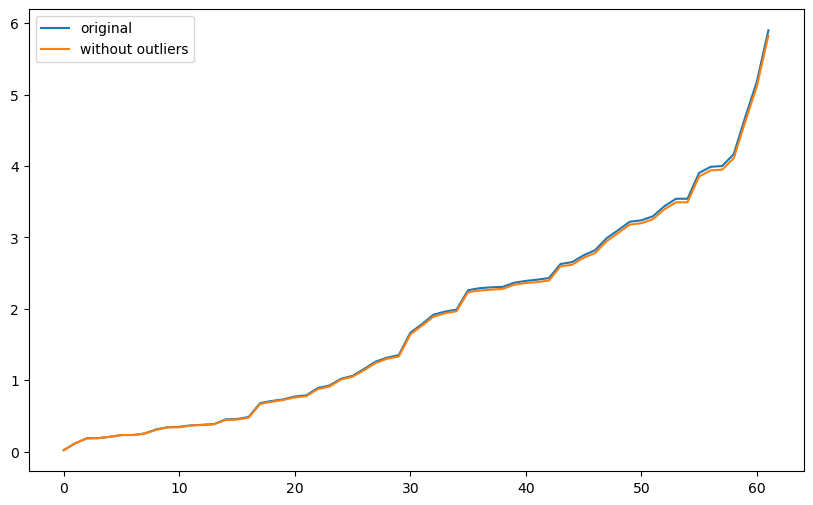

In [27]:
plt.figure(figsize=(10,6))
plt.plot(sorted(abs(linmod1.evaluate(X[:,None] - Y))), label='original')
plt.plot(sorted(abs(linmod3.evaluate(X[:,None] - Y))), label='without outliers')
plt.legend()
plt.show()

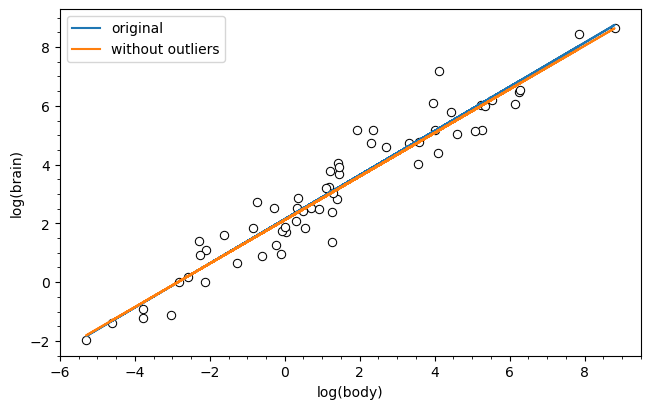

In [28]:
plt.figure(figsize=(7.5,4.5))
plt.scatter(X, Y, c="w", edgecolors="k", linewidths=0.75)
plt.plot(X, linmod1.evaluate(X[:,None]), label="original")
plt.plot(X, linmod3.evaluate(X[:,None]), label="without outliers")
plt.xlabel("log(body)")
plt.ylabel("log(brain)")
plt.minorticks_on()
plt.legend()
plt.show()

In [29]:
EE = abs(linmod3.evaluate(X[:,None]) - Y)
ZZ = inventory.modified_zscore(EE)

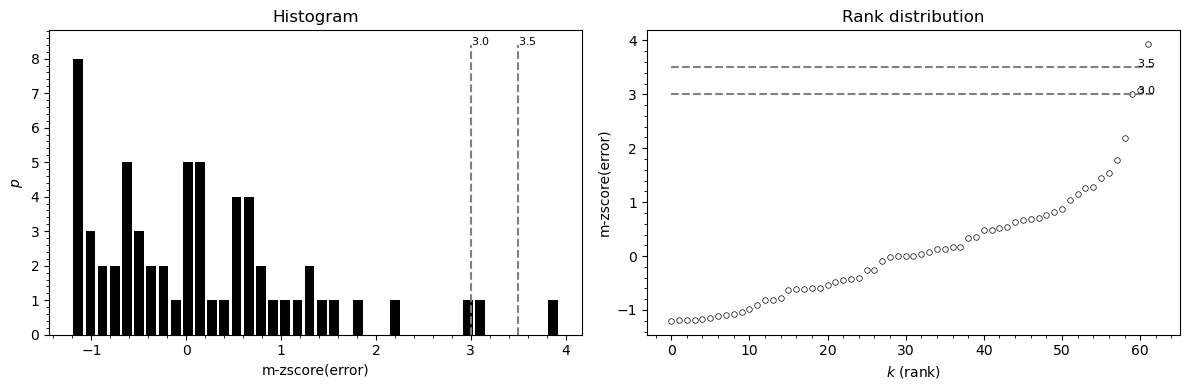

In [30]:
plots.plot_hist_and_rank_distribution(ZZ, ylabel="m-zscore(error)", levels=[3.0,3.5])

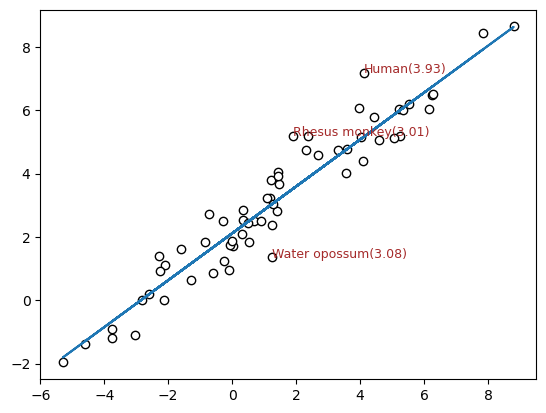

In [31]:
X_o = X[ZZ>=2.9]
Y_o = Y[ZZ>=2.9]
name_o = names[ZZ>=2.9]
zz = ZZ[ZZ>=2.9]
plt.scatter(X, Y, c="w", edgecolors="k")
for x,y,name,z in zip(X_o,Y_o,name_o, zz):
    plt.text(x,y, f"{name}({z:.2f})", fontsize=9, color='brown')
plt.plot(X, linmod3.evaluate(X[:,None]))
plt.show()